In [ ]:
!pip3 install pyvis
# !pip3 install scipy==1.8.1
# !pip3 install networkx==2.6.3
# !pip install --upgrade scipy networkx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
from pyvis import network as net
import plotly.graph_objects as go
from pandas.core.frame import DataFrame
from IPython.core.display import display, HTML

In [ ]:
data = pd.read_csv('/content/sample_data/Video Games Dataset.csv', usecols=['Publisher','Platform'])
print(data) 

    Platform                               Publisher
0        Wii                                Nintendo
1        NES                                Nintendo
2        Wii                                Nintendo
3        Wii                                Nintendo
4         GB                                Nintendo
..       ...                                     ...
194      PS3                         Electronic Arts
195       PS             Sony Computer Entertainment
196      PS4                         Electronic Arts
197     X360  Warner Bros. Interactive Entertainment
198       PS                                     NaN

[199 rows x 2 columns]


In [ ]:
data.isnull().sum()


Platform     0
Publisher    1
dtype: int64

In [ ]:
data.duplicated().sum()


141

In [ ]:
data['Publisher'].replace('N/A',np.NaN,inplace=True)
data['Publisher'].replace('NaN',np.NaN,inplace=True)

data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data


,Platform,Publisher
0,Wii,Nintendo
1,NES,Nintendo
4,GB,Nintendo
6,DS,Nintendo
15,X360,Microsoft Game Studios
16,PS3,Take-Two Interactive
17,SNES,Nintendo
22,X360,Take-Two Interactive
23,GBA,Nintendo
26,X360,Activision


In [ ]:
data.isnull().sum()


Platform     0
Publisher    0
dtype: int64

In [ ]:
 B = nx.Graph()
 Publisher = data['Publisher']
 Platform = data['Platform']
 print("Số nền tảng: ", Platform.nunique())
 print("Số nhà phát hành: ", Publisher.nunique())
 print("Số cạnh: ",len(data))


Số nền tảng:  20
Số nhà phát hành:  21
Số cạnh:  57


In [ ]:
for index, row in data.iterrows():
  B.add_edge(row['Publisher'], row['Platform'],weight=1)
B.add_nodes_from(Publisher,bipartite=0)
B.add_nodes_from(Platform,bipartite=1)


<Figure size 864x864 with 0 Axes>

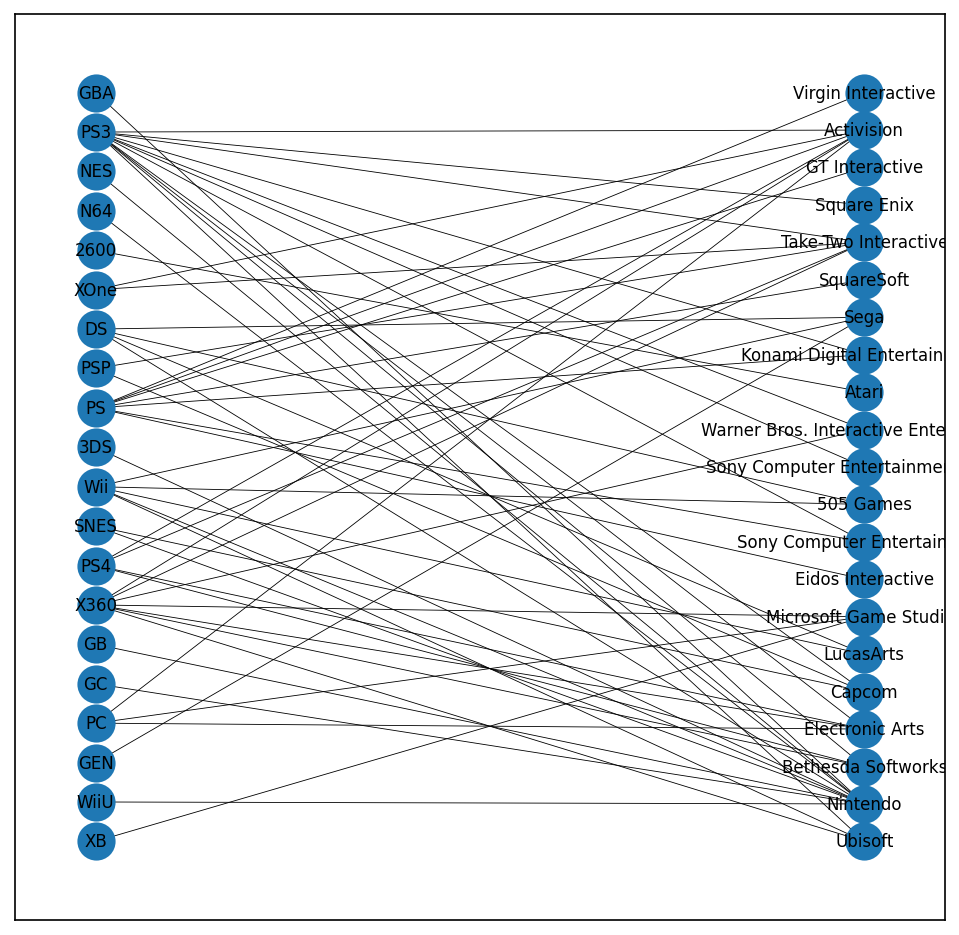

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Platform),font_size=8,width=0.4)

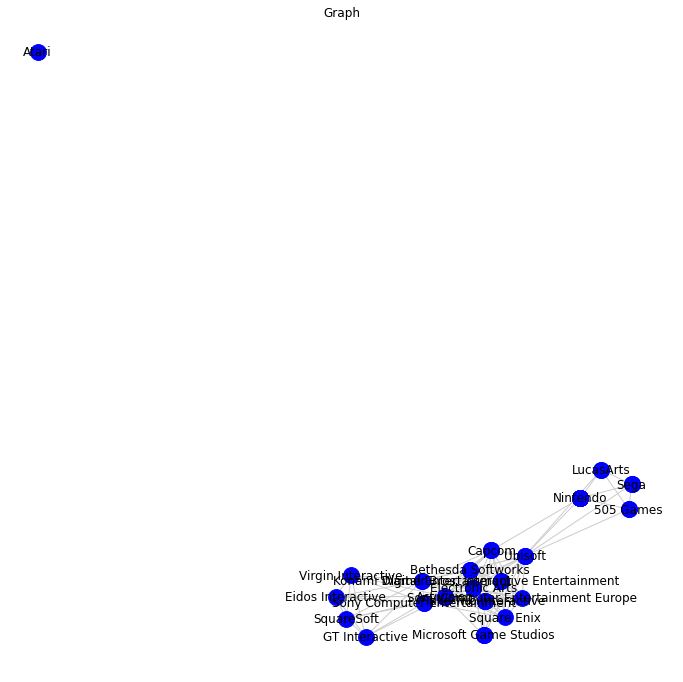

In [ ]:
from networkx.algorithms import bipartite
G = bipartite.weighted_projected_graph(B,Publisher.unique())
plt.figure(figsize=(12,12))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G,layout,nodelist=Publisher,node_size=250,node_color='blue')
nx.draw_networkx_edges(G,layout,edge_color='#cccccc')
node_labels=dict(zip(Publisher,Publisher))
nx.draw_networkx_labels(G,layout,labels=node_labels)
plt.axis('off')
plt.title('Graph')
plt.show()

In [ ]:
labels = nx.get_edge_attributes(G, 'weight')
df = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df = df.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df.to_csv (r'/content/sample_data/gephi1.csv', index = False, header=True)

In [ ]:
df = pd.read_csv('/content/sample_data/gephi1.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Nintendo,Ubisoft
1,Nintendo,Sega
2,Nintendo,Capcom
3,Nintendo,505 Games
4,Nintendo,LucasArts
...,...,...
85,Konami Digital Entertainment,Sony Computer Entertainment Europe
86,Sony Computer Entertainment Europe,Warner Bros. Interactive Entertainment
87,Sony Computer Entertainment Europe,Square Enix
88,Virgin Interactive,Eidos Interactive


In [ ]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 20
Số cạnh của đồ thị là 90


In [ ]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

In [ ]:
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

In [ ]:
import numpy as np
values = list(partition.values())

print('Số lượng cộng đồng: ', len(np.unique(values)))

Số lượng cộng đồng:  3


Ubisoft : 0.08286022686361888
Activision : 0.07661842725980304
Konami Digital Entertainment : 0.07179139073176209
Sony Computer Entertainment : 0.07179139073176209
Capcom : 0.057750080007881725
Bethesda Softworks : 0.05634579780691671
Take-Two Interactive : 0.05634579780691671
Warner Bros. Interactive Entertainment : 0.05634579780691671
Electronic Arts : 0.05634579780691671
Square Enix : 0.05151134118203882
Sony Computer Entertainment Europe : 0.05151134118203882
Nintendo : 0.03719116825624314
Eidos Interactive : 0.03575429270571593
SquareSoft : 0.03575429270571593
GT Interactive : 0.03575429270571593
Virgin Interactive : 0.03575429270571593
Microsoft Game Studios : 0.03395299848021598
Sega : 0.03220709108470163
505 Games : 0.03220709108470163
LucasArts : 0.03220709108470163


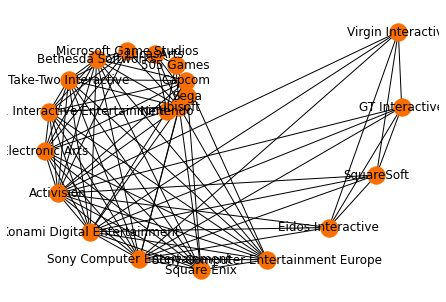

In [ ]:
ppr1 = nx.pagerank(G)
sortedRank = dict(sorted(ppr1.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedRank.items():
        print(attr, ":", value)
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

In [ ]:
groups = [] # Tạo group sẵn
print("------------- Phân cụm -------------")
for i in range(len(np.unique(values))):
  print("==> Group ", i, "===========================")
  values = []
  for name, k in partition.items():
    if k == i:
       print(name, end=' | ')
       values.append(name)
  groups.append(values)
  print()
  print()


------------- Phân cụm -------------
==> Group  0 ===========================
Activision | Konami Digital Entertainment | Sony Computer Entertainment | Eidos Interactive | SquareSoft | GT Interactive | Virgin Interactive | 

==> Group  1 ===========================
Nintendo | Ubisoft | Sega | 505 Games | LucasArts | 

==> Group  2 ===========================
Capcom | Microsoft Game Studios | Bethesda Softworks | Take-Two Interactive | Warner Bros. Interactive Entertainment | Electronic Arts | Square Enix | Sony Computer Entertainment Europe | 



In [ ]:
group_0 = data.loc[data['Publisher'].isin(groups[0])]
print(group_0)

    Platform                     Publisher
26      X360                    Activision
30       PS4                    Activision
31       PS3                    Activision
47        PS   Sony Computer Entertainment
49       PS3   Sony Computer Entertainment
81        PS                    SquareSoft
95      XOne                    Activision
125       PC                    Activision
126       PS                GT Interactive
131      PS3  Konami Digital Entertainment
132       PS  Konami Digital Entertainment
137       PS            Virgin Interactive
162       PS             Eidos Interactive
179       PS                    Activision


In [ ]:
result0 = pd.pivot_table(group_0, values = "Publisher", index=["Platform"], aggfunc=np.count_nonzero)
result0 = result0.reset_index(["Platform"])
result0.sort_values(by = "Publisher", ascending = False)
group_0.to_csv("group0.csv", index = False, header = True, encoding = "utf-8")


In [ ]:
group_1 = data.loc[data['Publisher'].isin(groups[1])]
print(group_1)

    Platform  Publisher
0        Wii   Nintendo
1        NES   Nintendo
4         GB   Nintendo
6         DS   Nintendo
17      SNES   Nintendo
23       GBA   Nintendo
29       3DS   Nintendo
42       N64   Nintendo
55       Wii    Ubisoft
80       Wii       Sega
100       GC   Nintendo
101     WiiU   Nintendo
106      Wii  505 Games
117      PS3    Ubisoft
130      GEN       Sega
136      Wii  LucasArts
139       DS  505 Games
144     X360    Ubisoft
168       DS       Sega
187       DS  LucasArts


In [ ]:
result1 = pd.pivot_table(group_0, values = "Publisher", index=["Platform"], aggfunc=np.count_nonzero)
result1 = result1.reset_index(["Platform"])
result1.sort_values(by = "Publisher", ascending = False)
group_1.to_csv("group1.csv", index = False, header = True, encoding = "utf-8")


In [ ]:
group_2 = data.loc[data['Publisher'].isin(groups[2])]
print(group_2)

    Platform                               Publisher
15      X360                  Microsoft Game Studios
16       PS3                    Take-Two Interactive
22      X360                    Take-Two Interactive
40       PS4                    Take-Two Interactive
70      X360                      Bethesda Softworks
72       PS4                         Electronic Arts
74        XB                  Microsoft Game Studios
77       PS3                         Electronic Arts
78        PC                         Electronic Arts
84       PSP                    Take-Two Interactive
93      X360                         Electronic Arts
102      PS4                      Bethesda Softworks
115      PS3                      Bethesda Softworks
124     SNES                                  Capcom
133      PS3      Sony Computer Entertainment Europe
145      PS3  Warner Bros. Interactive Entertainment
147      PSP                                  Capcom
154      PS3                             Squar

In [ ]:
result2 = pd.pivot_table(group_0, values = "Publisher", index=["Platform"], aggfunc=np.count_nonzero)
result2 = result2.reset_index(["Platform"])
result2.sort_values(by = "Publisher", ascending = False)
group_2.to_csv("group2.csv", index = False, header = True, encoding = "utf-8")


[['Nintendo', 'Sega', 'LucasArts', '505 Games'], ['Ubisoft', 'Microsoft Game Studios', 'Konami Digital Entertainment', 'Bethesda Softworks', 'Eidos Interactive', 'Sony Computer Entertainment', 'SquareSoft', 'Take-Two Interactive', 'Warner Bros. Interactive Entertainment', 'Square Enix', 'Electronic Arts', 'Capcom', 'GT Interactive', 'Activision', 'Virgin Interactive', 'Sony Computer Entertainment Europe']]


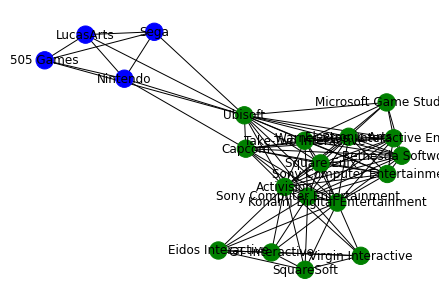

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

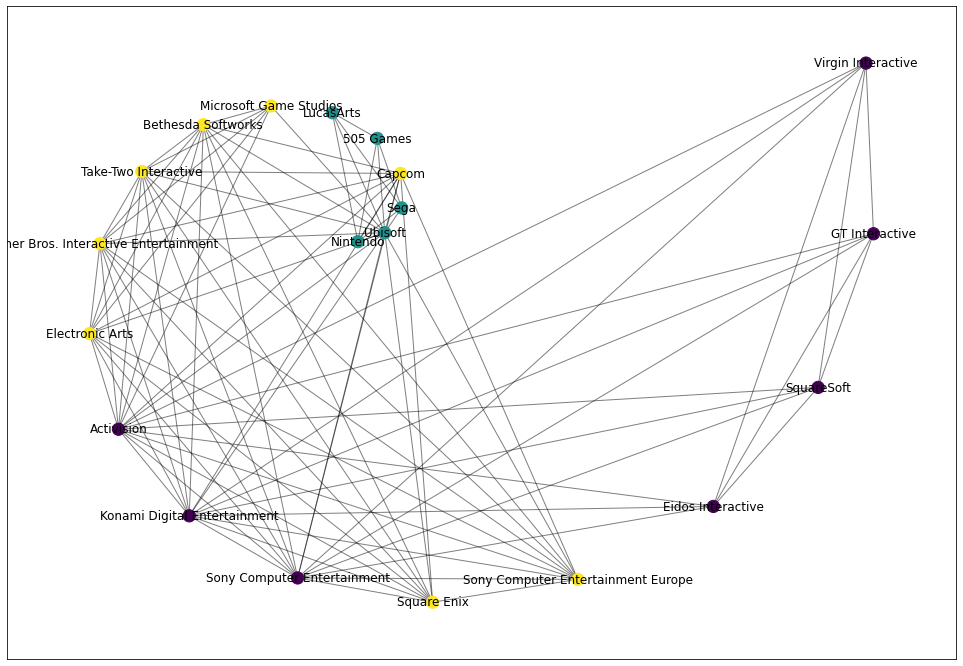

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm

plt.figure(figsize=(17, 12))
#compute the best partition
partition = community_louvain.best_partition(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality_df = print_table(closeness_centrality.items(), ['Node', 'Closeness centrality'])

closeness_centrality_df

,Node,Closeness centrality
0,Nintendo,0.513514
1,Ubisoft,0.826087
2,Sega,0.500000
3,Capcom,0.703704
4,505 Games,0.500000
5,LucasArts,0.500000
6,Microsoft Game Studios,0.593750
7,Bethesda Softworks,0.703704
8,Take-Two Interactive,0.703704
9,Warner Bros. Interactive Entertainment,0.703704


In [ ]:
top_ten_max_closeness_cen = sorted_closeness_centrality[:10]
print('Top 10 nhà phát hành có Closeness centrality cao nhất: ')
print_table(top_ten_max_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 nhà phát hành có Closeness centrality cao nhất: 


,Counrty,Closeness centrality
0,Ubisoft,0.826087
1,Activision,0.826087
2,Konami Digital Entertainment,0.791667
3,Sony Computer Entertainment,0.791667
4,Capcom,0.703704
5,Bethesda Softworks,0.703704
6,Take-Two Interactive,0.703704
7,Warner Bros. Interactive Entertainment,0.703704
8,Electronic Arts,0.703704
9,Square Enix,0.678571


In [ ]:
top_ten_min_closeness_cen = sorted_closeness_centrality[-10:]
print('Top 10 phát hành có Closeness centrality nhỏ nhất: ')
print_table(top_ten_min_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 phát hành có Closeness centrality nhỏ nhất: 


,Counrty,Closeness centrality
0,Sony Computer Entertainment Europe,0.678571
1,Microsoft Game Studios,0.593750
2,Eidos Interactive,0.527778
3,SquareSoft,0.527778
4,GT Interactive,0.527778
5,Virgin Interactive,0.527778
6,Nintendo,0.513514
7,Sega,0.500000
8,505 Games,0.500000
9,LucasArts,0.500000


In [ ]:
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)

bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])

bet_cen_df

,Node,Betweenness centrality
0,Nintendo,1.500000
1,Ubisoft,51.833333
2,Sega,0.000000
3,Capcom,6.500000
4,505 Games,0.000000
5,LucasArts,0.000000
6,Microsoft Game Studios,0.000000
7,Bethesda Softworks,0.833333
8,Take-Two Interactive,0.833333
9,Warner Bros. Interactive Entertainment,0.833333


In [ ]:
top_ten_max_bet_cen = sorted_bet_cen[:10]
print('Top 10 nhà phát hành có Betweenness centrality lớn nhất: ')
print_table(top_ten_max_bet_cen, ['DestinationCountry', 'Betweenness centrality'])

Top 10 nhà phát hành có Betweenness centrality lớn nhất: 


,DestinationCountry,Betweenness centrality
0,Ubisoft,51.833333
1,Activision,20.833333
2,Konami Digital Entertainment,16.000000
3,Sony Computer Entertainment,16.000000
4,Capcom,6.500000
5,Nintendo,1.500000
6,Bethesda Softworks,0.833333
7,Take-Two Interactive,0.833333
8,Warner Bros. Interactive Entertainment,0.833333
9,Electronic Arts,0.833333


In [ ]:
top_ten_min_bet_cen = sorted_bet_cen[-10:]
print('Top 10 nhà phát hành có Betweenness centrality nhỏ nhất nhất: ')
print_table(top_ten_min_bet_cen, ['DestinationCountry', 'Betweenness centrality'])

Top 10 nhà phát hành có Betweenness centrality nhỏ nhất nhất: 


,DestinationCountry,Betweenness centrality
0,Sega,0.0
1,505 Games,0.0
2,LucasArts,0.0
3,Microsoft Game Studios,0.0
4,Square Enix,0.0
5,Sony Computer Entertainment Europe,0.0
6,Eidos Interactive,0.0
7,SquareSoft,0.0
8,GT Interactive,0.0
9,Virgin Interactive,0.0
